In [1]:
from numpy.random import seed
seed(101)
from tensorflow.random import set_seed 
set_seed(101)

import pandas as pd
import numpy as np

import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Number of samples we want in each class.Total images used = SAMPLE_SIZE X 2
# The minority class is class 1 with 78786 samples.

SAMPLE_SIZE = 78786

IMAGE_SIZE = 50

In [4]:
os.listdir(r'C:\Users\LENOVO\OneDrive\Desktop\breast cancer detection using deep learning\datasets\original\IDC_regular_ps50_idx5')

['10253',
 '10254',
 '10255',
 '10256',
 '10257',
 '10258',
 '10259',
 '10260',
 '10261',
 '10262',
 '10264',
 '10268',
 '10269',
 '10272',
 '10273',
 '10274',
 '10275',
 '10276',
 '10277',
 '10278',
 '10279',
 '10282',
 '10285',
 '10286',
 '10288',
 '10290',
 '10291',
 '10292',
 '10293',
 '10295',
 '10299',
 '10300',
 '10301',
 '10302',
 '10303',
 '10304',
 '10305',
 '10306',
 '10307',
 '10308',
 '12241',
 '12242',
 '12626',
 '12748',
 '12749',
 '12750',
 '12751',
 '12752',
 '12810',
 '12811',
 '12817',
 '12818',
 '12819',
 '12820',
 '12821',
 '12822',
 '12823',
 '12824',
 '12826',
 '12867',
 '12868',
 '12869',
 '12870',
 '12871',
 '12872',
 '12873',
 '12875',
 '12876',
 '12877',
 '12878',
 '12879',
 '12880',
 '12881',
 '12882',
 '12883',
 '12884',
 '12886',
 '12890',
 '12891',
 '12892',
 '12893',
 '12894',
 '12895',
 '12896',
 '12897',
 '12898',
 '12900',
 '12901',
 '12905',
 '12906',
 '12907',
 '12908',
 '12909',
 '12910',
 '12911',
 '12929',
 '12930',
 '12931',
 '12932',
 '12933',


In [5]:
# Check the number of patient folders.

In [6]:
patients = os.listdir(r'C:\Users\LENOVO\OneDrive\Desktop\breast cancer detection using deep learning\datasets\original\IDC_regular_ps50_idx5')

len(patients)

279

In [13]:
# Create a new directory to store all available images
all_images_dir = 'all_images_dir'
os.mkdir(all_images_dir)

In [7]:
# check that the new diectory has been created
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is D443-F6CB

 Directory of c:\Users\LENOVO\OneDrive\Desktop\breast cancer detection using deep learning

17-05-2024  11:15    <DIR>          .
17-05-2024  11:15    <DIR>          ..
01-05-2024  19:29    <DIR>          all_images_dir
27-04-2024  05:53     3,326,820,824 archive.zip
28-04-2024  19:45    <DIR>          base_dir
16-05-2024  10:26           687,786 cancer.ipynb
17-05-2024  11:17           687,520 cancer_code.ipynb
15-05-2024  15:12               334 classification_report.txt
27-04-2024  07:57    <DIR>          datasets
15-05-2024  15:02         6,273,336 model.h5
02-05-2024  02:44    <DIR>          model_1
15-05-2024  15:06           365,051 predictions.csv
               6 File(s)  3,334,834,851 bytes
               6 Dir(s)  14,329,606,144 bytes free


In [9]:
# This code copies all images from their seperate folders into the same 
# folder called all_images_dir.

# Create a list with all the patient id numbers.
# Each patient id folder has 2 sub folders --> folder 0 and folder 1

# Example:
    # '10285'
        # '0'
        # '1'

# create a list of all patient id's
import shutil
parent_dir = r'C:\Users\Admin\Pictures\bcd\datasets\IDC_regular_ps50_idx5'
all_images_dir=r'C:\Users\Admin\Pictures\bcd\all_images_dir'
patient_list = os.listdir(parent_dir)

for patient in patient_list:
    
    path_0 = os.path.join(parent_dir, patient, '0')
    path_1 = os.path.join(parent_dir, patient, '1')

    
    # create a list of all files in folder 0
    file_list_0 = os.listdir(path_0)
    # create a list of list all file in folder 1
    file_list_1 = os.listdir(path_1)

    # move the 0 images to all_images_dir
    for fname in file_list_0:

        # source path to image
        src = os.path.join(path_0, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


    # move the 1 images to all_images_dir
    for fname in file_list_1:

        # source path to image
        src = os.path.join(path_1, fname)
        # destination path to image
        dst = os.path.join(all_images_dir, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

In [8]:
# check how many images are in all_images_dir
# should be 277,524

# size: 2.5GB

len(os.listdir('all_images_dir'))

277524

In [11]:
#Create a dataframe containing all the information

In [9]:
image_list = os.listdir('all_images_dir')

df_data = pd.DataFrame(image_list, columns=['image_id'])

df_data.head()

,image_id
0,10253_idx5_x1001_y1001_class0.png
1,10253_idx5_x1001_y1051_class0.png
2,10253_idx5_x1001_y1101_class0.png
3,10253_idx5_x1001_y1151_class0.png
4,10253_idx5_x1001_y1201_class0.png


In [10]:
# Define Helper Functions

# Each file name has this format:
# '14211_idx5_x2401_y1301_class1.png'

def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    # the id is the first index in the list
    patient_id = a[0]
    
    return patient_id

def extract_target(x):
    # split into a list
    a = x.split('_')
    # the target is part of the string in index 4
    b = a[4]
    # the ytarget i.e. 1 or 2 is the 5th index of the string --> class1
    target = b[5]
    
    return target

# extract the patient id

# create a new column called 'patient_id'
df_data['patient_id'] = df_data['image_id'].apply(extract_patient_id)
# create a new column called 'target'
df_data['target'] = df_data['image_id'].apply(extract_target)

df_data.head(10)

,image_id,patient_id,target
0,10253_idx5_x1001_y1001_class0.png,10253,0
1,10253_idx5_x1001_y1051_class0.png,10253,0
2,10253_idx5_x1001_y1101_class0.png,10253,0
3,10253_idx5_x1001_y1151_class0.png,10253,0
4,10253_idx5_x1001_y1201_class0.png,10253,0
5,10253_idx5_x1001_y1251_class0.png,10253,0
6,10253_idx5_x1001_y1301_class0.png,10253,0
7,10253_idx5_x1001_y1351_class0.png,10253,0
8,10253_idx5_x1001_y1501_class0.png,10253,0
9,10253_idx5_x1001_y1551_class0.png,10253,0


In [11]:
df_data.shape

(277524, 3)

In [15]:
# Display a random sample of train images by class

In [12]:
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['image_id']
            im=cv2.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=16)  
    plt.tight_layout()
    plt.show()

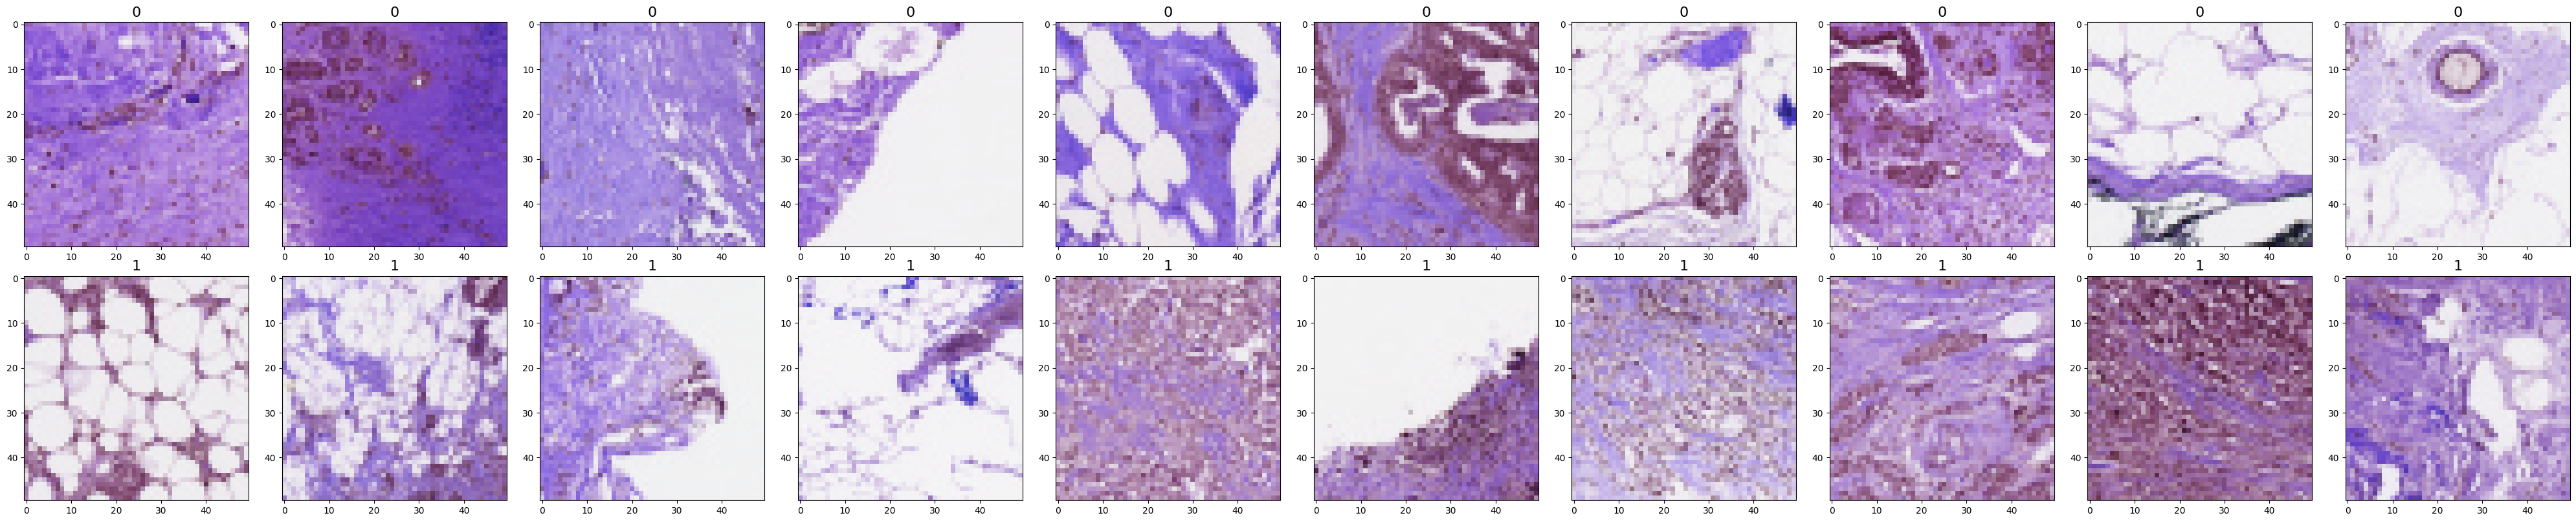

In [13]:
IMAGE_PATH = 'all_images_dir/'
draw_category_images('target',10, df_data, IMAGE_PATH)

In [18]:
# Balance the class distribution

In [14]:
# What is the class distribution?

df_data['target'].value_counts()

target
0    198738
1     78786
Name: count, dtype: int64

In [15]:
# take a sample of the majority class 0 (total = 198738)
df_0 = df_data[df_data['target'] == '0'].sample(SAMPLE_SIZE, random_state=101)
# take a sample of class 1 (total = 78786)
df_1 = df_data[df_data['target'] == '1'].sample(SAMPLE_SIZE, random_state=101)

# concat the two dataframes
df_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)

# Check the new class distribution
df_data['target'].value_counts()

target
0    78786
1    78786
Name: count, dtype: int64

In [21]:
# Create the train and val sets

In [16]:
y = df_data['target']
df_train, df_val = train_test_split(df_data, test_size=0.10, random_state=101, stratify=y)
print(df_train.shape)
print(df_val.shape)

(141814, 3)
(15758, 3)


In [17]:
df_train['target'].value_counts()

target
1    70907
0    70907
Name: count, dtype: int64

In [18]:
df_val['target'].value_counts()

target
0    7879
1    7879
Name: count, dtype: int64

In [25]:
# Create a Directory Structure

In [35]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


a_no_idc = os.path.join(train_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(train_dir, 'b_has_idc')
os.mkdir(b_has_idc)


a_no_idc = os.path.join(val_dir, 'a_no_idc')
os.mkdir(a_no_idc)
b_has_idc = os.path.join(val_dir, 'b_has_idc')
os.mkdir(b_has_idc)

In [19]:
# check that the folders have been created
os.listdir('base_dir/train_dir')

['a_no_idc', 'b_has_idc']

In [27]:
# Transfer the images into the folders

In [20]:
# Set the id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [39]:
# Get a list of train and val images
train_list = list(df_train['image_id'])


# Transfer the train images

for image in train_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    
    # source path to image
    src = os.path.join(all_images_dir, fname)
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)

In [40]:
# Transfer the val images

val_list = list(df_val['image_id'])

for image in val_list:
    
    # the id in the csv file does not have the .tif extension therefore we add it here
    fname = image
    # get the label for a certain image
    target = df_data.loc[image,'target']
    
    # these must match the folder names
    if target == '0':
        label = 'a_no_idc'
    if target == '1':
        label = 'b_has_idc'
    

    # source path to image
    src = os.path.join(all_images_dir, fname)
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # move the image from the source to the destination
    shutil.move(src, dst)

In [21]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/a_no_idc')))
print(len(os.listdir('base_dir/train_dir/b_has_idc')))

70907
70907


In [22]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/a_no_idc')))
print(len(os.listdir('base_dir/val_dir/b_has_idc')))

7879
7879


In [31]:
# End of Data Preparation
### ================================================================================== ###
# Start of Model Building

In [32]:
# Set Up the Generators

In [23]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'


#num_train_samples = len(df_train)
num_train_samples = 141810
num_val_samples = len(df_val)

train_batch_size = 10
val_batch_size = 10


train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [24]:
print("Train steps:", train_steps)
print("Validation steps:", val_steps)

Train steps: 14181.0
Validation steps: 1576.0


In [25]:
datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = datagen.flow_from_directory(train_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

val_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=val_batch_size,
                                        class_mode='categorical')

# Note: shuffle=False causes the test dataset to not be shuffled
test_gen = datagen.flow_from_directory(valid_path,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 141814 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.


In [52]:
# Create the Model Architecture

In [26]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128
dropout_conv = 0.3
dropout_dense = 0.3
model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        18496     
                                                      

In [38]:
# Train the Model

In [39]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit(train_gen, steps_per_epoch=train_steps, 
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    epochs=20, verbose=1,
                   callbacks=callbacks_list)

Epoch 1/20


14181/14181 [==============================] - 696s 49ms/step - loss: 0.4587 - accuracy: 0.7958 - val_loss: 0.3920 - val_accuracy: 0.8315 - lr: 1.0000e-04
Epoch 2/20
14181/14181 [==============================] - 234s 16ms/step - loss: 0.4011 - accuracy: 0.8270 - val_loss: 0.3824 - val_accuracy: 0.8390 - lr: 1.0000e-04
Epoch 3/20
14181/14181 [==============================] - 407s 29ms/step - loss: 0.3786 - accuracy: 0.8387 - val_loss: 0.3835 - val_accuracy: 0.8327 - lr: 1.0000e-04
Epoch 4/20
14181/14181 [==============================] - 649s 46ms/step - loss: 0.3658 - accuracy: 0.8453 - val_loss: 0.3502 - val_accuracy: 0.8513 - lr: 1.0000e-04
Epoch 5/20
14181/14181 [==============================] - 582s 41ms/step - loss: 0.3560 - accuracy: 0.8503 - val_loss: 0.3325 - val_accuracy: 0.8628 - lr: 1.0000e-04
Epoch 6/20
14181/14181 [==============================] - 461s 33ms/step - loss: 0.3478 - accuracy: 0.8544 - val_loss: 0.3377 - val_accuracy: 0.8578 - lr: 1.0000e-04
Ep

In [41]:
model.save('model.h5')

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model.save(filepath = "model_weights/model.h5", overwrite=True)

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

In [44]:
# Here the best epoch will be used.

model.load_weights('model.h5')

val_loss, val_acc = \
model.evaluate(test_gen, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

15758/15758 [==============================] - 46s 3ms/step - loss: 0.3038 - accuracy: 0.8766
val_loss: 0.3038485646247864
val_acc: 0.8765706419944763


In [45]:
#Plot the Training Curves

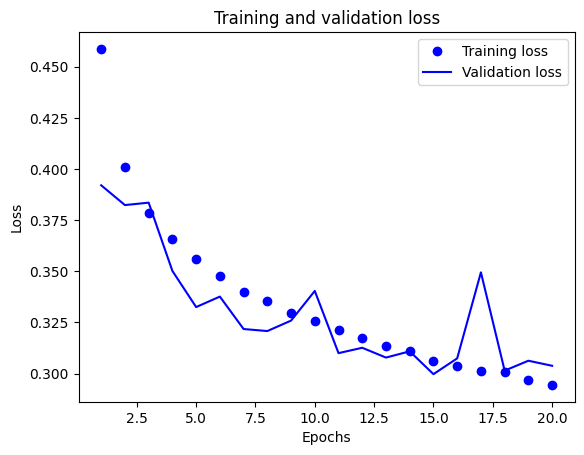

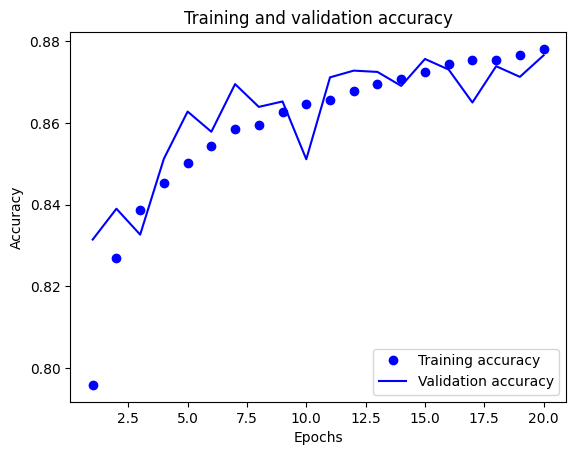

In [97]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plotting loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
#Make a prediction on the val set
#We need these predictions to calculate the AUC score, print the Confusion Matrix and calculate the F1 score.

In [47]:
# make a prediction
predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

    1/15758 [..............................] - ETA: 44:49

C:\Users\Admin\AppData\Local\Temp\ipykernel_16892\2435426349.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_gen, steps=len(df_val), verbose=1)


15758/15758 [==============================] - 43s 3ms/step


In [48]:
predictions.shape

(15758, 2)

In [49]:
# This is how to check what index keras has internally assigned to each class. 
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

In [50]:
# Put the predictions into a dataframe.
# The columns need to be oredered to match the output of the previous cell

df_preds = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

df_preds.head()

,no_idc,has_idc
0,0.184249,0.815751
1,0.400407,0.599593
2,0.768247,0.231753
3,0.865272,0.134728
4,0.688440,0.311560


In [123]:
import pandas as pd

# Create a DataFrame to store the predictions
df_preds = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

# Save DataFrame to CSV file
df_preds.to_csv('predictions.csv', index=False)  # Set index=False to avoid saving row indices as a column

# Display the first few rows of the DataFrame
print(df_preds.head())


     no_idc   has_idc
0  0.184249  0.815751
1  0.400407  0.599593
2  0.768247  0.231753
3  0.865272  0.134728
4  0.688440  0.311560


1: 8506
0: 7252


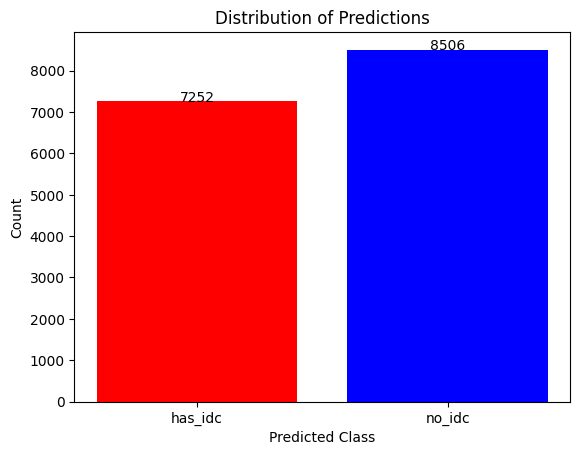

In [105]:
import matplotlib.pyplot as plt

# Assuming df_preds contains the predictions
# Assuming each prediction has two classes: 'no_idc' and 'has_idc'

# Threshold for binary classification
threshold = 0.5

# Convert probabilities to binary predictions
df_preds['predicted_class'] = (df_preds['has_idc'] > threshold).astype(int)

# Count the occurrences of each class
class_counts = df_preds['predicted_class'].value_counts()

# Plotting histogram for predicted classes
bars = plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])

plt.title('Distribution of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(class_counts.index, ['no_idc', 'has_idc'])

# Annotate bars with counts
for bar, count in zip(bars, class_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), ha='center')

# Print class names and counts on new lines
for class_name, count in zip(class_counts.index, class_counts.values):
    print(f"{class_name}: {count}")

plt.show()


In [52]:
# Get the true labels
y_true = test_gen.classes

# Get the predicted labels as probabilities
y_pred = df_preds['has_idc']

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred)

0.9488726726475858

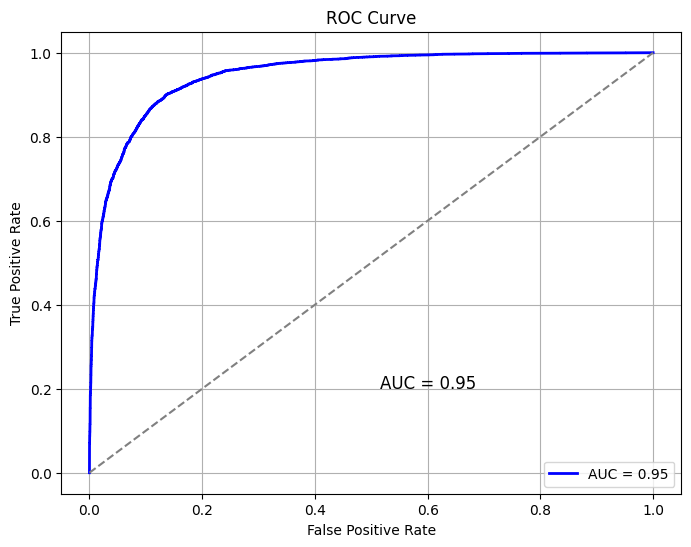

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate AUC-ROC score
auc_score = roc_auc_score(y_true, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Annotate ROC score
plt.text(0.6, 0.2, f'AUC = {auc_score:.2f}', fontsize=12, ha='center')

plt.grid(True)
plt.show()


In [ ]:
"""

Recall (Sensitivity):
Recall, also known as sensitivity or true positive rate (TPR), measures the proportion of actual positive instances (true positives) that were correctly identified by the model.
Mathematically, recall is calculated as the ratio of true positives (TP) to the sum of true positives and false negatives (FN):
Recall= True Positives+False Negatives/True Positives
Recall quantifies the model's ability to capture all positive instances from the dataset. A high recall value (contd...)
indicates that the model effectively identifies most of the positive instances, minimizing false negatives.
​

Precision:
Precision measures the proportion of predicted positive instances (true positives) that were actually positive.
Mathematically, precision is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP):
Precision= True Positives+False Positives/True Positives
​Precision quantifies the model's ability to avoid false positives. A high precision value indicates that the model makes fewer false 
positive predictions, resulting in a higher confidence in the positive predictions made by the model.


"""


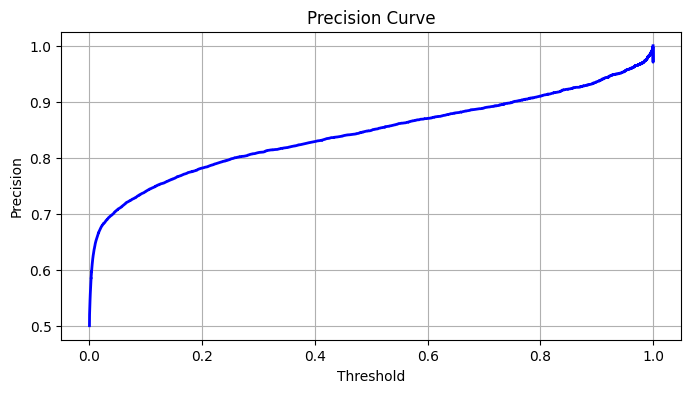

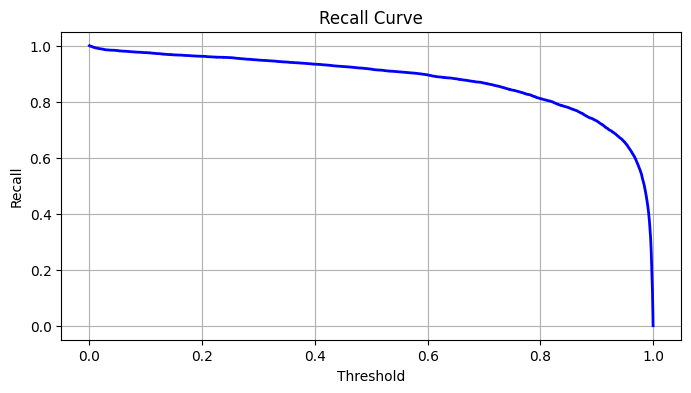

In [115]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

# Plot precision curve
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precision[:-1], color='blue', lw=2)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision Curve')
plt.grid(True)
plt.show()

# Plot recall curve
plt.figure(figsize=(8, 4))
plt.plot(thresholds, recall[:-1], color='blue', lw=2)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall Curve')
plt.grid(True)
plt.show()


In [54]:
#Create a Confusion Matrix

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [56]:
test_labels = test_gen.classes

In [57]:
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [58]:
test_gen.class_indices

{'a_no_idc': 0, 'b_has_idc': 1}

Confusion matrix, without normalization
[[6593 1286]
 [ 659 7220]]


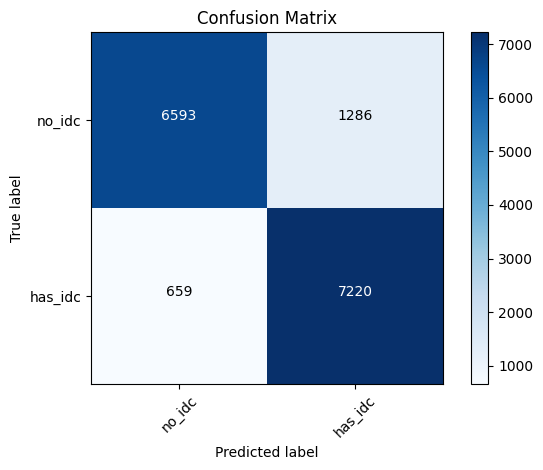

In [59]:
cm_plot_labels = ['no_idc', 'has_idc']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [60]:
#Create a Classification Report

In [61]:
from sklearn.metrics import classification_report

# Generate a classification report

# For this to work we need y_pred as binary labels not as probabilities
y_pred_binary = predictions.argmax(axis=1)

report = classification_report(y_true, y_pred_binary, target_names=cm_plot_labels)

print(report)

              precision    recall  f1-score   support

      no_idc       0.91      0.84      0.87      7879
     has_idc       0.85      0.92      0.88      7879

    accuracy                           0.88     15758
   macro avg       0.88      0.88      0.88     15758
weighted avg       0.88      0.88      0.88     15758



In [63]:
"""
Recall **= Given a class, will the classifier be able to detect it?
**Precision = Given a class prediction from a classifier, how likely is it to be correct?
F1 Score = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

"""

'\nRecall **= Given a class, will the classifier be able to detect it?\n**Precision = Given a class prediction from a classifier, how likely is it to be correct?\nF1 Score = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.\n\n'